In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('/content/btc_data.csv', date_parser = True)
data

,Date,Open,High,Low,Close
0,1/18/2022,41741.0,42476.0,41319.0,42401.0
1,1/17/2022,43011.0,43275.0,41632.0,41741.0
2,1/16/2022,43332.0,43472.0,42622.0,43011.0
3,1/15/2022,43329.0,43775.0,42620.0,43346.0
4,1/14/2022,42826.0,43411.0,41865.0,43329.0
...,...,...,...,...,...
361,1/22/2021,31275.0,33842.0,28898.0,33375.0
362,1/21/2021,34919.0,35664.0,31048.0,31275.0
363,1/20/2021,36494.0,36788.0,33487.0,34892.0
364,1/19/2021,36252.0,37843.0,36170.0,36494.0


In [ ]:
data_training = data[data['Date']< '7/16/2021'].copy()
data_training

,Date,Open,High,Low,Close
0,1/18/2022,41741.0,42476.0,41319.0,42401.0
1,1/17/2022,43011.0,43275.0,41632.0,41741.0
2,1/16/2022,43332.0,43472.0,42622.0,43011.0
3,1/15/2022,43329.0,43775.0,42620.0,43346.0
4,1/14/2022,42826.0,43411.0,41865.0,43329.0
...,...,...,...,...,...
361,1/22/2021,31275.0,33842.0,28898.0,33375.0
362,1/21/2021,34919.0,35664.0,31048.0,31275.0
363,1/20/2021,36494.0,36788.0,33487.0,34892.0
364,1/19/2021,36252.0,37843.0,36170.0,36494.0


In [ ]:
data_test = data[data['Date']>= '7/16/2021'].copy()
data_test

,Date,Open,High,Low,Close
110,9/30/2021,41133.0,44110.0,40984.0,43432.0
111,9/29/2021,41792.0,42538.0,40806.0,41114.0
112,9/28/2021,42708.0,43364.0,41145.0,41792.0
113,9/27/2021,43607.0,44318.0,42689.0,42696.0
114,9/26/2021,42719.0,43695.0,40827.0,43607.0
...,...,...,...,...,...
196,7/6/2021,33847.0,35058.0,33601.0,33941.0
197,7/5/2021,35542.0,35945.0,33171.0,33847.0
198,7/4/2021,34715.0,35679.0,34297.0,35542.0
199,7/3/2021,33124.0,34926.0,33106.0,34715.0


In [ ]:
 training_data = data_training.drop(['Date'], axis = 1)
 training_data.head()

,Open,High,Low,Close
0,41741.0,42476.0,41319.0,42401.0
1,43011.0,43275.0,41632.0,41741.0
2,43332.0,43472.0,42622.0,43011.0
3,43329.0,43775.0,42620.0,43346.0
4,42826.0,43411.0,41865.0,43329.0


In [ ]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.29299259, 0.27111638, 0.33377224, 0.30922985],
       [0.32744635, 0.29313528, 0.34218305, 0.29128141],
       [0.33615474, 0.29856422, 0.36878594, 0.32581856],
       ...,
       [0.15064703, 0.11436603, 0.12331381, 0.10502556],
       [0.14408182, 0.1434398 , 0.19541033, 0.14859132],
       [0.15162367, 0.13214099, 0.15969796, 0.14209181]])

In [ ]:
X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
  X_train.append(training_data[i-60:i])
  Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(221, 60, 4)

In [ ]:
Y_train.shape[0]

221

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 4)))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            11000     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_5 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_6 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.1)

Epoch 1/20
4/4 [==============================] - 7s 446ms/step - loss: 0.3131 - val_loss: 0.0063
Epoch 2/20
4/4 [==============================] - 1s 245ms/step - loss: 0.1449 - val_loss: 0.1023
Epoch 3/20
4/4 [==============================] - 1s 242ms/step - loss: 0.0877 - val_loss: 0.0287
Epoch 4/20
4/4 [==============================] - 1s 248ms/step - loss: 0.0952 - val_loss: 0.0346
Epoch 5/20
4/4 [==============================] - 1s 239ms/step - loss: 0.0793 - val_loss: 0.0840
Epoch 6/20
4/4 [==============================] - 1s 241ms/step - loss: 0.0642 - val_loss: 0.1355
Epoch 7/20
4/4 [==============================] - 1s 238ms/step - loss: 0.0633 - val_loss: 0.1054
Epoch 8/20
4/4 [==============================] - 1s 245ms/step - loss: 0.0563 - val_loss: 0.0695
Epoch 9/20
4/4 [==============================] - 1s 245ms/step - loss: 0.0588 - val_loss: 0.0716
Epoch 10/20
4/4 [==============================] - 1s 240ms/step - loss: 0.0521 - val_loss: 0.0938
Epoch 11/20
4/4 [==

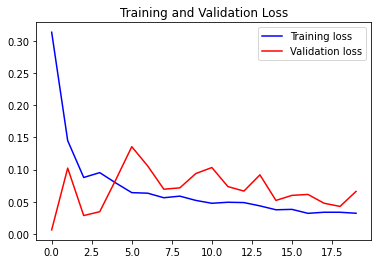

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date'], axis = 1)
df

,Open,High,Low,Close
0,57706.0,60040.0,57145.0,57533.0
1,56392.0,58197.0,54298.0,57834.0
2,56398.0,56952.0,53311.0,56379.0
3,60259.0,60738.0,55030.0,56398.0
4,61002.0,61674.0,59348.0,60173.0
...,...,...,...,...
140,33847.0,35058.0,33601.0,33941.0
141,35542.0,35945.0,33171.0,33847.0
142,34715.0,35679.0,34297.0,35542.0
143,33124.0,34926.0,33106.0,34715.0


In [ ]:
scaler = MinMaxScaler()
inputs = scaler.fit_transform(inputs)
inputs

array([[0.89414863, 0.94493621, 0.92765189, 0.88859272],
       [0.85194939, 0.88495834, 0.83415435, 0.89825936],
       [0.85214208, 0.84444155, 0.80174056, 0.85153189],
       [0.97613848, 0.96765165, 0.85819376, 0.85214208],
       [1.        , 0.99811247, 1.        , 0.97337658],
       [0.87115422, 1.        , 0.89477833, 1.        ],
       [0.89463036, 0.8823874 , 0.86246305, 0.87086518],
       [0.86999807, 0.87587868, 0.83802956, 0.89463036],
       [0.78518209, 0.85762171, 0.79924466, 0.86929154],
       [0.7071424 , 0.77499349, 0.74055829, 0.78518209],
       [0.65000963, 0.68162588, 0.67224959, 0.70755989],
       [0.6014516 , 0.66190445, 0.64545156, 0.65000963],
       [0.61898645, 0.59837933, 0.59931034, 0.60116257],
       [0.57977391, 0.60003905, 0.57714286, 0.61898645],
       [0.67724324, 0.67602838, 0.61270936, 0.57999872],
       [0.56529   , 0.7016402 , 0.60834154, 0.67724324],
       [0.60954461, 0.62470711, 0.59921182, 0.56564327],
       [0.4942514 , 0.59906274,

In [ ]:
X_test = [] 
Y_test = []
for i in range(60, inputs.shape[0]):
  X_test.append(inputs[i-60:i])
  Y_test.append(inputs[i,0])
X_test, Y_test = np.array(X_test), np.array(Y_test)
Y_pred = model.predict(X_test)

In [ ]:
scaler.scale_

array([2.71289439e-05, 2.75580787e-05, 2.68716075e-05, 2.71946046e-05])

In [ ]:
scale = 1/5.18164146e-05
Y_test = Y_test*scale 
Y_pred = Y_pred*scale
Y_pred

array([[6.1064376e+07],
       [6.0079956e+07],
       [6.0305372e+07],
       [6.2136652e+07],
       [6.5907224e+07],
       [7.1723312e+07],
       [7.9337128e+07],
       [8.8394024e+07],
       [9.8592968e+07],
       [1.0950861e+08],
       [1.2070486e+08],
       [1.3192314e+08],
       [1.4309786e+08],
       [1.5418536e+08],
       [1.6510576e+08],
       [1.7579093e+08],
       [1.8612619e+08],
       [1.9590187e+08],
       [2.0490811e+08],
       [2.1295269e+08],
       [2.1991811e+08],
       [2.2574166e+08],
       [2.3047784e+08],
       [2.3418501e+08],
       [2.3710493e+08],
       [2.3965763e+08],
       [2.4212306e+08],
       [2.4465270e+08],
       [2.4729877e+08],
       [2.5000549e+08],
       [2.5258666e+08],
       [2.5485165e+08],
       [2.5670176e+08],
       [2.5809101e+08],
       [2.5900808e+08],
       [2.5941312e+08],
       [2.5927651e+08],
       [2.5863842e+08],
       [2.5759688e+08],
       [2.5627709e+08],
       [2.5476869e+08],
       [2.531533

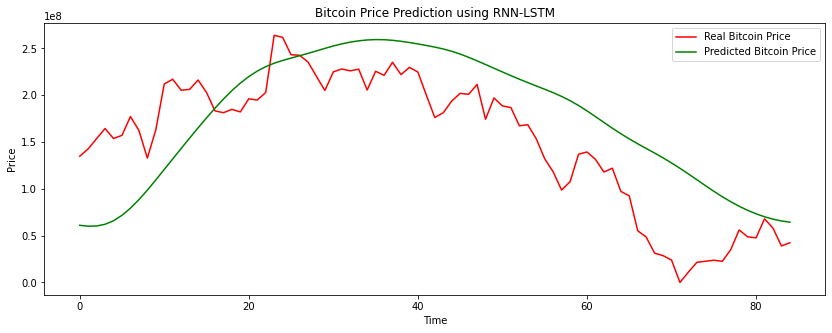

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()